In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from pprint import pprint

In [2]:
# Load file data
Top50_df = pd.read_csv("Resources/Top 50 Data.csv")
Viral50_df = pd.read_csv("Resources/Viral 50 Data.csv")
Top50_df["Original DF"] = "Top 50"
Viral50_df["Original DF"] = "Viral 50"

In [3]:
# Split the datasets so only the track features are included for analysis
Top50_df_features = Top50_df[["Original DF", 
                              "acousticness",
                              "danceability",
                              "energy",
                              "instrumentalness",
                              "liveness",
                              "mode",
                              "speechiness",
                              "valence"]]

Viral50_df_features = Viral50_df[["Original DF", 
                                "acousticness", 
                                "danceability", 
                                "energy", 
                                "instrumentalness",
                                "liveness", 
                                "mode", 
                                "speechiness", 
                                "valence"]]

combined_df = pd.concat([Top50_df_features, Viral50_df_features])

In [4]:
# Create some summary statistics for the Top & Viral 50 playlists
bar_df = combined_df.groupby(["Original DF"]).mean()
bar_df

,acousticness,danceability,energy,instrumentalness,liveness,mode,speechiness,valence
Original DF,,,,,,,,
Top 50,0.222122,0.63544,0.64470,0.023750,0.159464,0.60,0.101576,0.458632
Viral 50,0.308492,0.69024,0.63162,0.095545,0.140314,0.62,0.111388,0.530400


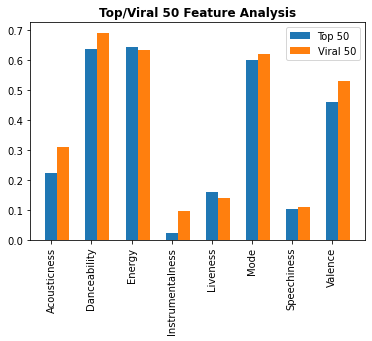

In [5]:
# Create a bar chart to visualise the above table
Top50_bar = bar_df.iloc[0].tolist()
Viral50_bar = bar_df.iloc[1].tolist()
categories = ["Acousticness", "Danceability", "Energy", "Instrumentalness", "Liveness", "Mode", "Speechiness", "Valence"]

width =0.3
plt.figure(facecolor='white')
plt.bar(np.arange(len(Top50_bar)), Top50_bar, width=width)
plt.bar(np.arange(len(Viral50_bar))+ width, Viral50_bar, width=width)
plt.xticks(range(len(categories)), categories, rotation = 90)
plt.title("Top/Viral 50 Feature Analysis", weight = "bold")
plt.legend(["Top 50", "Viral 50"])
plt.savefig(f"Images/Top and Viral 50 Feature Analysis.png", dpi=300, bbox_inches='tight')

In [6]:
# Create a function to compare any two variables in the dataframe (creates a boxplot, scatter plot and prints any outliers picked up)

def build_summary(df, var1, var2):
    
    print(f"Summary charts for {var1} & {var2}\n")
    print("-----------------------------------------------------------------------------")
    print(f"1. Box Plot")
    print("-----------------------------------------------------------------------------")
    
    # Create the box plot
    cat1 = list(df[f"{var1}"])
    cat2 = list(df[f"{var2}"])
    plt.figure(facecolor='white')
    plt.boxplot([cat1, cat2], labels=[var1, var2])
    plt.ylim(0, 1)
    plt.ylabel("Value")
    plt.xlabel("Metric")
    plt.title(f"{var1} & {var2} Box Plot", weight = "bold")
    plt.savefig(f"Images/{var1} {var2} box plot.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n-----------------------------------------------------------------------------")
    print(f"2. Scatter Plot")
    print("-----------------------------------------------------------------------------\n")
    
    # Create x and y values
    x_values = df[f"{var1}"]
    y_values = df[f"{var2}"]

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.figure(facecolor='white')
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

    # Label plot
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f"{var1} & {var2} Scatter Plot", weight = "bold")
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.savefig(f"Images/{var1} {var2} scatter plot.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Print r square value
    print(f"R squared: {rvalue**2:.2f}")
    print(f"R value: {rvalue:.2f}")
    
    print("\n-----------------------------------------------------------------------------")
    print(f"3. Outliers")
    print("-----------------------------------------------------------------------------")
    
    # Define the quartiles & inter-quartile range
    Q3 = np.quantile(df[f"{var1}"], 0.75)
    Q1 = np.quantile(df[f"{var1}"], 0.25)
    IQR = Q3 - Q1
    
    # Define upper/lower limits for outliers
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR

    print(f"\nUpper range outliers for {var1}")
    outlier_df = df[df[f"{var1}"] > upper_range]
    pprint(outlier_df[["artist_name", "album_name", "track_name", var1, var2]])
    
    print("-----------------------------------------------------------------------------")

    print(f"\nLower range outliers for {var1}")
    outlier_df = df[df[f"{var1}"] < lower_range]
    pprint(outlier_df[["artist_name", "album_name", "track_name", var1, var2]])
    
    print("-----------------------------------------------------------------------------")

    # Define the quartiles & inter-quartile range
    Q3 = np.quantile(df[f"{var2}"], 0.75)
    Q1 = np.quantile(df[f"{var2}"], 0.25)
    IQR = Q3 - Q1

    # Define upper/lower limits for quartiles
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR      
      
    print(f"\nUpper range outliers for {var2}")
    outlier_df = df[df[f"{var2}"] > upper_range]
    pprint(outlier_df[["artist_name", "album_name", "track_name", var1, var2]])
    
    print("-----------------------------------------------------------------------------")
    
    print(f"\nLower range outliers for {var2}")
    outlier_df = df[df[f"{var2}"] < lower_range]
    pprint(outlier_df[["artist_name", "album_name", "track_name", var1, var2]])
    
    print("-----------------------------------------------------------------------------")

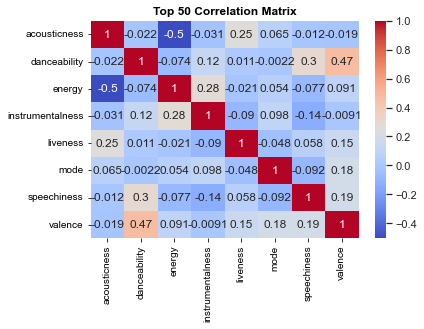

In [7]:
# Top 50 Correlation Matrix creation
plt.figure(facecolor='white')
plt.title("Top 50 Correlation Matrix", weight = "bold")
sns.set(style="whitegrid")
corr = Top50_df_features.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.savefig("Images/Top 50 Features Matrix.png", dpi=300, bbox_inches='tight')

Summary charts for danceability & valence

-----------------------------------------------------------------------------
1. Box Plot
-----------------------------------------------------------------------------


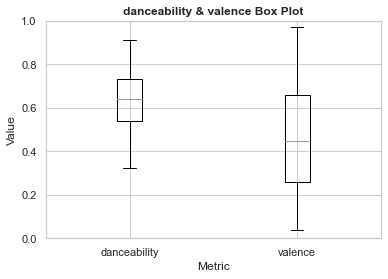


-----------------------------------------------------------------------------
2. Scatter Plot
-----------------------------------------------------------------------------



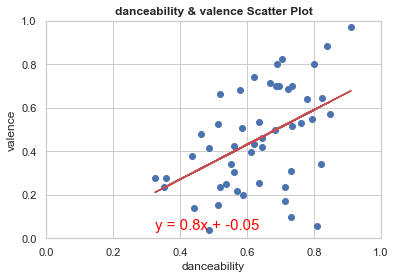

R squared: 0.22
R value: 0.47

-----------------------------------------------------------------------------
3. Outliers
-----------------------------------------------------------------------------

Upper range outliers for danceability
Empty DataFrame
Columns: [artist_name, album_name, track_name, danceability, valence]
Index: []
-----------------------------------------------------------------------------

Lower range outliers for danceability
Empty DataFrame
Columns: [artist_name, album_name, track_name, danceability, valence]
Index: []
-----------------------------------------------------------------------------

Upper range outliers for valence
Empty DataFrame
Columns: [artist_name, album_name, track_name, danceability, valence]
Index: []
-----------------------------------------------------------------------------

Lower range outliers for valence
Empty DataFrame
Columns: [artist_name, album_name, track_name, danceability, valence]
Index: []
-------------------------------------

In [12]:
build_summary(Top50_df, "danceability", "valence")

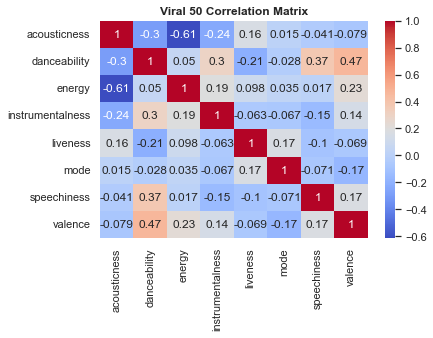

In [9]:
# VIral 50 Correlation Matrix creation
plt.figure(facecolor='white')
plt.title("Viral 50 Correlation Matrix", weight = "bold")
sns.set(style="whitegrid")
corr = Viral50_df_features.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.savefig("Images/Viral 50 Features Matrix.png", dpi=300, bbox_inches='tight')

Summary charts for energy & acousticness

-----------------------------------------------------------------------------
1. Box Plot
-----------------------------------------------------------------------------


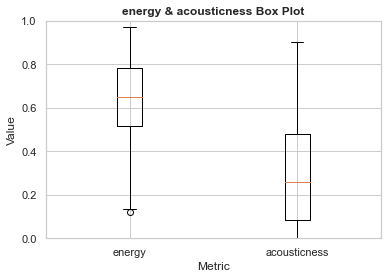


-----------------------------------------------------------------------------
2. Scatter Plot
-----------------------------------------------------------------------------



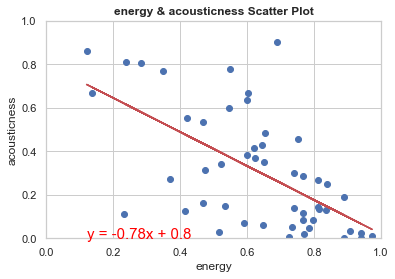

R squared: 0.38
R value: -0.61

-----------------------------------------------------------------------------
3. Outliers
-----------------------------------------------------------------------------

Upper range outliers for energy
Empty DataFrame
Columns: [artist_name, album_name, track_name, energy, acousticness]
Index: []
-----------------------------------------------------------------------------

Lower range outliers for energy
          artist_name     album_name     track_name  energy  acousticness
40  Alexander Stewart  blame's on me  blame's on me   0.121         0.863
-----------------------------------------------------------------------------

Upper range outliers for acousticness
Empty DataFrame
Columns: [artist_name, album_name, track_name, energy, acousticness]
Index: []
-----------------------------------------------------------------------------

Lower range outliers for acousticness
Empty DataFrame
Columns: [artist_name, album_name, track_name, energy, acousticness]

In [11]:
build_summary(Viral50_df, "energy", "acousticness")